# Network visualization and metrics

In [12]:
import os
import json
import networkx as nx

data_dir = os.getcwd()+ "/../renkan/data/Balzac"
#data_dir = os.getcwd()+ "/../renkan/data/toBe"
print data_dir

network_files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]
print "%s files to process"%len(network_files)

network_data = []
for net_file in network_files:
    with open(os.path.join(data_dir,net_file), "r") as f:
        network_data.append(json.load(f))

/Users/rubiela/workspace/repository/meta-education/notebooks/../renkan/data/Balzac
19 files to process


[u'updated', u'description', u'created', u'color', u'views', u'title', u'uri', u'edges', u'revCounter', u'schema_version', u'nodes', u'space_id', u'users']
0 - carte Balzac Pierre et Paul  - 8 nodes, 6 edges - 394 rev
1 - Carte Balzac Clara et Astrid  - 15 nodes, 12 edges - 574 rev
2 - Carte Balzac Maxime et Lucie - 25 nodes, 24 edges - 1160 rev
3 - Carte Balzac Thomas/Nicolas - 18 nodes, 17 edges - 751 rev
4 - Carte Balzac Galitcho et Pau - 24 nodes, 23 edges - 1022 rev
5 - Carte Balzac Amanda & Laura - 15 nodes, 13 edges - 1024 rev
6 - carte Balzac Daphné et Ingrid - 18 nodes, 17 edges - 1640 rev
7 - Carte BALZAC Diane & Inès - 20 nodes, 19 edges - 952 rev
8 - carte Balzac Inès Lydia  - 16 nodes, 14 edges - 1176 rev
9 - carte Balzac Jean   - 23 nodes, 22 edges - 817 rev
10 - Carte Balzac Samy - 10 nodes, 9 edges - 466 rev
11 - carte balzac pierre et paul - 0 nodes, 0 edges - 11 rev
12 - Carte Balzac Geoffroy & Ilana - 16 nodes, 15 edges - 927 rev
13 - carte Balzac Betty Sentoura - 21

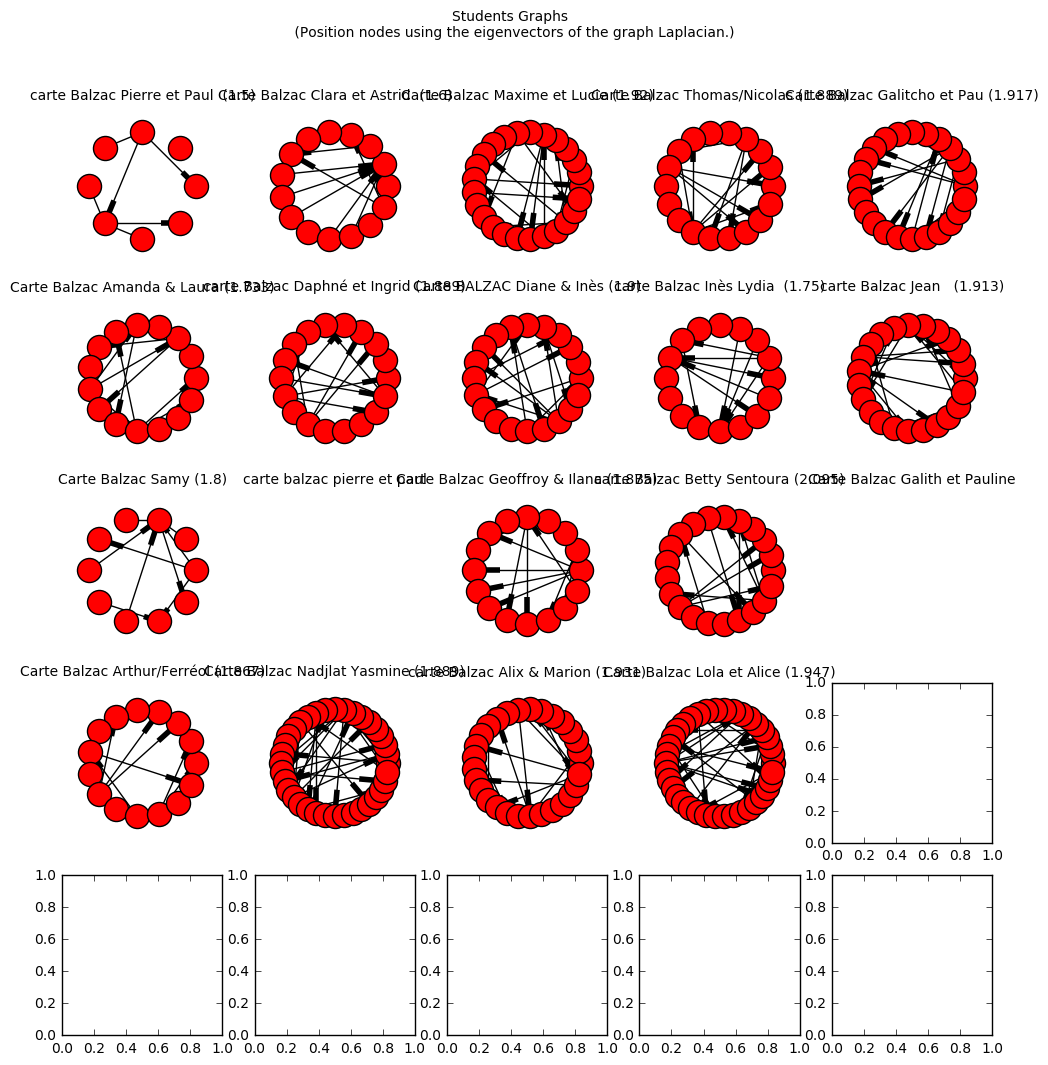

In [20]:
print network_data[0].keys()

%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout
from collections import Counter

# compute a grid size that will fit all graphs on it (couple blanks likely)
nr = int(np.ceil(np.sqrt(len(network_files))))

fig, axs = plt.subplots(nr, nr, num=1, figsize=(12,12))
plt.suptitle("Students Graphs \n (Position nodes using the eigenvectors of the graph Laplacian.)")

graphs = []

titles = []
URIs = []

for i,net in enumerate(network_data):
    title= "%s - %s - %s nodes, %s edges - %s rev"%(i, net["title"], len(net["nodes"]), len(net["edges"]), net["revCounter"])
    print title
    
    # create graph
    G = nx.DiGraph()

    # add elements to the graph
    for n in net["nodes"] : 
        G.add_node(n["@id"], attr_dict=n)
        titles.append(n["title"])
        URIs.append( (n["uri"], i) )
    for e in net["edges"] : 
        G.add_edge(e["from"], e["to"], attr_dict=e)
        
#    print "%s nodes, %s edges"%( len(G.nodes()),len(G.edges()))
        
    # compute index for the subplot, and set this subplot as current
    ix = np.unravel_index(i, axs.shape)
    plt.sca(axs[ix])
    
#    pos=graphviz_layout(G)
    nx.draw_circular(G, ax=axs[ix])
    
#    title = "%s (%s)"%(net["title"], round(sum(G.degree().values())/float(len(G)), 3))
#    title = "%s (%s)"%(net["title"], round(float((sum(G.degree().values()))/len(G)), 2))

    if len(G) !=0:
        title = "%s (%s)"%(net["title"], round(sum(G.degree().values())/float(len(G)), 3))
    else:
        title = "%s"%(net["title"])
        
    axs[ix].set_title(title, fontsize=10)
    axs[ix].set_axis_off()
    
    graphs.append(G)

print "%s graphs"%len(graphs)

URIs:
0 http://upload.wikimedia.org/wikipedia/commons/d/d9/HBalzac_original.jpg
0 
0 
0 
0 
0 
0 
0 
1 
1 
1 
1 http://www.google.fr/url?source=imglanding&ct=img&q=http://www.luxembourg.public.lu/pictures/photos/fr-photos-site/culture/litterature/WE_vieux_livre.jpg&sa=X&ei=jGtHVabCFoHPaOvugZgH&ved=0CAkQ8wc&usg=AFQjCNHalfJgyDKvwR7OySQJDiqvZ3qZyg
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
2 
3 
3 
3 
3 
3 
3 
3 
3 
3 
3 
3 
3 
3 
3 
3 
3 
3 
3 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
4 
5 
5 
5 
5 
5 
5 
5 
5 
5 
5 
5 
5 
5 
5 
5 
6 rousse.fr/archives/grande-encyclopedie/page/1546
6 
6 
6 
6 
6 
6 
6 
6 
6 
6 
6 
6 
6 
6 
6 
6 
6 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
7 
8 
8 
8 
8 
8  
8 
8 
8 
8 
8 
8 
8 
8 
8 
8 
8 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
9 
10 
10 
10 
10 
10 
10 
10 
10 
10 
10 
12 
12 
12 
12 
12 
12 
12 
12 
12 
12 
12 
12 
12 
12
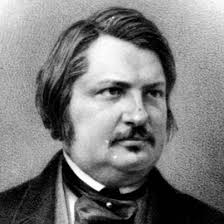

In [65]:
#for c in Counter([u[0] for u in URIs]).most_common():
#    print c[0], c[1]
import collections

print 'URIs:'
#for i,net in enumerate(network_data):
#    for n in net["nodes"]:  
#        c = collections.Counter(n)
#        for u in URIs:
#            print i, u[0], u[1] 
            
for u in URIs:
    print u[1],u[0]

#for c in Counter([u count in URIs]).most_common():
#    print '%s: %7d' % (u, count)

In [25]:
for c in Counter(titles).most_common():
    print c[0], c[1]

La petite fille a reconnu Bronski 8
Vidéo Josef cherche l'inspiration 8
Vidéo Entrée/sortie des toilettes 8
Vidéo Maria reconnaît son mari 8
"Hitler" est passionné par la vitrine de charcuterie 8
Le comédien joue "mal"/surjoue 8
Siletski comprend qu'il a affaire à un faux Erhardt 8
Vidéo Josef répète la même chose 8
"Hitler" surgit des toilettes du théâtre 8
le "public" reconnaît que c'est du bluff 8
On a déjà entendu le texte (citation) 8
Vidéo Costumes de "Gestapo" 8
Sobinski soupçonne Siletski 8
Le capitaine s'appelle Mumm comme le champagne 8
Le "making of" est exhibé 8
Vidéo Hitler et la charcuterie 8
Vidéo Sobinski soupçonne Siletski 8
Vidéo Mort, définitivement mort 8
Vidéo On va jouer Meurtre à l'opéra 8
Vidéo Joseph meuble en riant 8
Vidéo Maria en rajoute 8
Maria en rajoute dans son numéro de charme 8
Les costumes des nazis viennent de la pièce Gestapo 8
Il y a une petite blague quelque part 8
Vidéo Bronski démasqué 8
Josef va chercher l'inspiration dans le théâtre 8
Maria re

### Valeurs de base 

Calculer les valeurs utilisés par les indicateurs